# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from urllib.error import HTTPError

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Create a dataframe with randomly selected cities

df = pd.DataFrame({
    "City": cities

})

#Export dataframe as a CSV
df.to_csv("cities.csv", index=False, header=True)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
settings = {"units": "imperial", "appid": api_key}
cities_df = pd.read_csv("cities.csv")
cities100_df = cities_df.iloc[0:100,:]



In [31]:
# Get data for first batch of cities


weather_data = []
for index, row in cities100_df.iterrows():
    
    try:
        if len(owm.get_current(row[0], **settings))> 0:
            weather_data.append(owm.get_current(row[0], **settings))
        else:
            continue
            
    except HTTPError as err:
        if (err.code == 404 or err.code == 400):
            print('city does not exist')

In [32]:
# Split city list by batch of 100 cities by batch: Batch 2

cities200_df = cities_df.iloc[100:200,:]

In [33]:

for index, row in cities100_df.iterrows():
    
    try:
        if len(owm.get_current(row[0], **settings))> 0:
            weather_data.append(owm.get_current(row[0], **settings))
        else:
            continue
            
    except HTTPError as err:
        if (err.code == 404 or err.code == 400):
            print('city does not exist')

In [34]:
# Split city list by batch of 100 cities by batch: Batch 3

cities300_df = cities_df.iloc[200:300,:]

In [35]:
for index, row in cities300_df.iterrows():
    
    try:
        if len(owm.get_current(row[0], **settings))> 0:
            weather_data.append(owm.get_current(row[0], **settings))
        else:
            continue
            
    except HTTPError as err:
        if (err.code == 404 or err.code == 400):
            print('city does not exist')

In [36]:
# Split city list by batch of 100 cities by batch: Batch 4

cities400_df = cities_df.iloc[300:400,:]

In [37]:
for index, row in cities400_df.iterrows():
    
    try:
        if len(owm.get_current(row[0], **settings))> 0:
            weather_data.append(owm.get_current(row[0], **settings))
        else:
            continue
            
    except HTTPError as err:
        if (err.code == 404 or err.code == 400):
            print('city does not exist')

In [38]:
# Split city list by batch of 100 cities by batch: Batch 5

cities500_df = cities_df.iloc[400:500,:]

In [39]:
for index, row in cities500_df.iterrows():
    
    try:
        if len(owm.get_current(row[0], **settings))> 0:
            weather_data.append(owm.get_current(row[0], **settings))
        else:
            continue
            
    except HTTPError as err:
        if (err.code == 404 or err.code == 400):
            print('city does not exist')

In [40]:
# Split city list by batch of 100 cities by batch: Batch 6

cities600_df = cities_df.iloc[500:600,:]

In [41]:
for index, row in cities600_df.iterrows():
    
    try:
        if len(owm.get_current(row[0], **settings))> 0:
            weather_data.append(owm.get_current(row[0], **settings))
        else:
            continue
            
    except HTTPError as err:
        if (err.code == 404 or err.code == 400):
            print('city does not exist')

In [42]:
summary = ["name","coord.lat", "coord.lon", "main.temp", "main.humidity", "main.temp_min", "main.temp_max", 
           "wind.speed", "clouds.all","timezone"]

In [43]:
data = [response(*summary) for response in weather_data]
column_names = ['Station','Latitude', 'Longitude', 'Temperature', 'Humidity', 'Temperature Min','Temperature Max' , 
                'Wind Speed', 'Cloudines', "Timezone"]

weather_data = pd.DataFrame(data, columns=column_names)


In [19]:
# Create the bins for latitude ranges ranges
# Bins are 0, 59, 69, 79, 89, 100.   
bins = [-90, -65.5, -23.5, 0, 23.5, 65.5, 90]

# Create the names for the four bins
group_names = ["Antarctic", "Southern_Temperate", "Tropic_Capricorn", "Tropic_Cancer", "Northern Temperate", 
               "Arctic"]


weather_data["Latitude Division"] = pd.cut(weather_data["Latitude"], bins, labels=group_names)
weather_data.head()

,Station,Latitude,Longitude,Temperature,Humidity,Temperature Min,Temperature Max,Wind Speed,Cloudines,Timezone,Latitude Division
0,George Town,5.41,100.34,82.27,74,82.00,82.40,8.05,20,28800,Tropic_Cancer
1,Hobart,-42.88,147.33,52.84,93,48.99,55.40,2.24,6,39600,Southern_Temperate
2,Mataura,-46.19,168.86,57.00,80,57.00,57.00,3.00,100,46800,Southern_Temperate
3,Atuona,-9.80,-139.03,81.23,80,81.23,81.23,13.00,32,-34200,Tropic_Capricorn
4,Pelym,61.01,62.00,23.49,94,23.49,23.49,11.45,100,18000,Northern Temperate


In [21]:
# Generate a csv with the data from dataframe

#Export file as a CSV
weather_data.to_csv("weather_data.csv", index=False, header=True)

In [22]:
# Grouping the dataframe by latitudinal divisions (mean values)

Grouped_weather = weather_data.groupby(['Latitude Division']).count()
Grouped_weather

,Station,Latitude,Longitude,Temperature,Humidity,Temperature Min,Temperature Max,Wind Speed,Cloudines,Timezone
Latitude Division,,,,,,,,,,
Antarctic,0,0,0,0,0,0,0,0,0,0
Southern_Temperate,89,89,89,89,89,89,89,89,89,89
Tropic_Capricorn,112,112,112,112,112,112,112,112,112,112
Tropic_Cancer,113,113,113,113,113,113,113,113,113,113
Northern Temperate,217,217,217,217,217,217,217,217,217,217
Arctic,36,36,36,36,36,36,36,36,36,36


In [23]:
# Read weather_data.csv
weather_data = pd.read_csv("weather_data.csv")

In [24]:
weather_data.head()

,Station,Latitude,Longitude,Temperature,Humidity,Temperature Min,Temperature Max,Wind Speed,Cloudines,Timezone,Latitude Division
0,George Town,5.41,100.34,82.27,74,82.00,82.40,8.05,20,28800,Tropic_Cancer
1,Hobart,-42.88,147.33,52.84,93,48.99,55.40,2.24,6,39600,Southern_Temperate
2,Mataura,-46.19,168.86,57.00,80,57.00,57.00,3.00,100,46800,Southern_Temperate
3,Atuona,-9.80,-139.03,81.23,80,81.23,81.23,13.00,32,-34200,Tropic_Capricorn
4,Pelym,61.01,62.00,23.49,94,23.49,23.49,11.45,100,18000,Northern Temperate


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

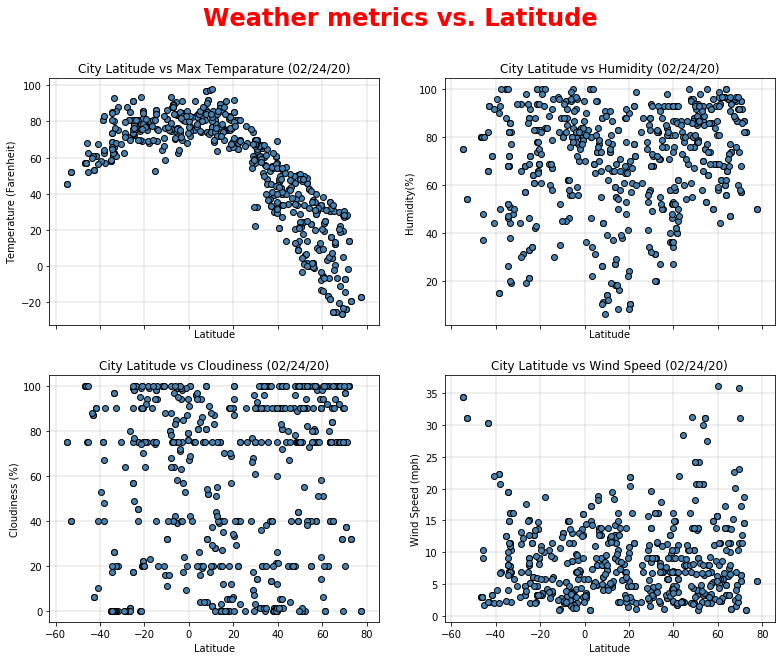

In [25]:
# Generating scatter plot for temperature vs. latitude 

fig, axes = plt.subplots(ncols=2,nrows=2, sharex = True, figsize=(13,10))
ax1, ax2, ax3, ax4 = axes.flatten()


fig.suptitle("Weather metrics vs. Latitude", fontsize=24, color="red",fontweight="bold")

# Generating scatter plot 1            
ax1.scatter(weather_data['Latitude'], weather_data['Temperature'], marker="o", facecolors="steelblue", edgecolors="black")
ax1.set_title('City Latitude vs Max Temparature (02/24/20)')
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Temperature (Farenheit)")
ax1.grid(axis ='y',color='grey', linestyle='-', linewidth=0.25)
ax1.grid(axis ='x',color='grey', linestyle='-', linewidth=0.25)

# Generating scatter plot 2            
ax2.scatter(weather_data['Latitude'], weather_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black")
ax2.set_title('City Latitude vs Humidity (02/24/20)')
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity(%)")
ax2.grid(axis ='y',color='grey', linestyle='-', linewidth=0.25)
ax2.grid(axis ='x',color='grey', linestyle='-', linewidth=0.25)

# Generating scatter plot 3             
ax3.scatter(weather_data['Latitude'], weather_data['Cloudines'], marker="o", facecolors="steelblue", edgecolors="black")
ax3.set_title('City Latitude vs Cloudiness (02/24/20)')
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
ax3.grid(axis ='y',color='grey', linestyle='-', linewidth=0.25)
ax3.grid(axis ='x',color='grey', linestyle='-', linewidth=0.25)

# Generating scatter plot 4            
ax4.scatter(weather_data['Latitude'], weather_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black")
ax4.set_title('City Latitude vs Wind Speed (02/24/20)')
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (mph)")
ax4.grid(axis ='y',color='grey', linestyle='-', linewidth=0.25)
ax4.grid(axis ='x',color='grey', linestyle='-', linewidth=0.25)


plt.savefig("Weather_analysis.png")

Observations:

1) Wind speed seems to be higher in latitudes higher at high latitudes north

2) Humidity also seems to be higher in high latitudes north

3) Temperatures changed with latitude: southern locations shows minimum temeprature of 40 degrees Farenheit whereas northern locations show a range from -40 to 80 Farenheit. 


    